In [113]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, accuracy_score, f1_score, recall_score, precision_score
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.utils import resample
from sklearn.model_selection import GridSearchCV

In [114]:
df=pd.read_csv('final_new.csv')

In [115]:
df.head()

,Unnamed: 0,CRASH DATE,CRASH TIME,BOROUGH,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,...,SEVERITY_CLASS,Temperature,Dew_point,Humidity,Wind_speed,Wind_gust,Pressure,Precipitation,Weather_condition,Broader_weather_condition
0,0,12/14/2021,8:17:00,BRONX,2,0,0,0,0,0,...,2,51.0,40.0,66.0,9.0,0.0,30.050,0.0,Partly Cloudy,Cloudy
1,1,12/14/2021,14:58:00,MANHATTAN,0,0,0,0,0,0,...,0,62.0,36.0,38.0,18.0,23.0,30.080,0.0,Mostly Cloudy,Cloudy
2,2,12/14/2021,16:50:00,QUEENS,0,0,0,0,0,0,...,0,45.0,17.0,33.0,8.0,0.0,30.410,0.0,Mostly Cloudy,Cloudy
3,3,12/14/2021,23:10:00,QUEENS,2,0,0,0,0,0,...,2,57.5,55.0,91.5,5.5,0.0,29.785,0.1,"Light Rain,Light Rain",Rain
4,4,12/14/2021,17:58:00,BROOKLYN,0,0,0,0,0,0,...,0,54.0,31.0,41.0,0.0,0.0,29.940,0.0,Partly Cloudy,Cloudy


In [116]:
df.drop(df.columns[0], axis=1, inplace=True)


In [117]:
df.drop('SEVERITY_CLASS', axis=1, inplace=True)


In [118]:
df

,CRASH DATE,CRASH TIME,BOROUGH,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,...,DAY OF WEEK,Temperature,Dew_point,Humidity,Wind_speed,Wind_gust,Pressure,Precipitation,Weather_condition,Broader_weather_condition
0,12/14/2021,8:17:00,BRONX,2,0,0,0,0,0,2,...,Tuesday,51.0,40.0,66.0,9.0,0.0,30.050,0.0,Partly Cloudy,Cloudy
1,12/14/2021,14:58:00,MANHATTAN,0,0,0,0,0,0,0,...,Tuesday,62.0,36.0,38.0,18.0,23.0,30.080,0.0,Mostly Cloudy,Cloudy
2,12/14/2021,16:50:00,QUEENS,0,0,0,0,0,0,0,...,Tuesday,45.0,17.0,33.0,8.0,0.0,30.410,0.0,Mostly Cloudy,Cloudy
3,12/14/2021,23:10:00,QUEENS,2,0,0,0,0,0,2,...,Tuesday,57.5,55.0,91.5,5.5,0.0,29.785,0.1,"Light Rain,Light Rain",Rain
4,12/14/2021,17:58:00,BROOKLYN,0,0,0,0,0,0,0,...,Tuesday,54.0,31.0,41.0,0.0,0.0,29.940,0.0,Partly Cloudy,Cloudy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,7/27/2012,13:30:00,MANHATTAN,0,0,0,0,0,0,0,...,Friday,79.0,53.0,40.0,13.0,21.0,29.960,0.0,Mostly Cloudy,Cloudy
1048571,7/13/2012,11:40:00,MANHATTAN,0,0,0,0,0,0,0,...,Friday,78.0,63.0,60.0,10.0,0.0,29.970,0.0,Mostly Cloudy,Cloudy
1048572,7/27/2012,20:00:00,MANHATTAN,0,0,0,0,0,0,0,...,Friday,80.0,64.0,58.0,0.0,0.0,29.880,0.0,Partly Cloudy,Cloudy
1048573,7/27/2012,16:00:00,BROOKLYN,0,0,0,0,0,0,0,...,Friday,79.0,65.0,62.0,18.0,24.0,29.850,0.0,Mostly Cloudy,Cloudy


In [119]:
df.isnull().sum()

CRASH DATE                        0
CRASH TIME                        0
BOROUGH                           0
NUMBER OF PERSONS INJURED         0
NUMBER OF PERSONS KILLED          0
NUMBER OF PEDESTRIANS INJURED     0
NUMBER OF PEDESTRIANS KILLED      0
NUMBER OF CYCLIST INJURED         0
NUMBER OF CYCLIST KILLED          0
NUMBER OF MOTORIST INJURED        0
NUMBER OF MOTORIST KILLED         0
CONTRIBUTING FACTOR VEHICLE 1     0
CONTRIBUTING FACTOR VEHICLE 2     0
VEHICLE TYPE CODE 1               0
VEHICLE TYPE CODE 2               0
COLLISION_ID                      0
DAY OF WEEK                       0
Temperature                       0
Dew_point                         0
Humidity                          0
Wind_speed                        0
Wind_gust                         0
Pressure                          0
Precipitation                     0
Weather_condition                11
Broader_weather_condition        11
dtype: int64

In [120]:
df.dropna(inplace=True)


In [121]:
df

,CRASH DATE,CRASH TIME,BOROUGH,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,...,DAY OF WEEK,Temperature,Dew_point,Humidity,Wind_speed,Wind_gust,Pressure,Precipitation,Weather_condition,Broader_weather_condition
0,12/14/2021,8:17:00,BRONX,2,0,0,0,0,0,2,...,Tuesday,51.0,40.0,66.0,9.0,0.0,30.050,0.0,Partly Cloudy,Cloudy
1,12/14/2021,14:58:00,MANHATTAN,0,0,0,0,0,0,0,...,Tuesday,62.0,36.0,38.0,18.0,23.0,30.080,0.0,Mostly Cloudy,Cloudy
2,12/14/2021,16:50:00,QUEENS,0,0,0,0,0,0,0,...,Tuesday,45.0,17.0,33.0,8.0,0.0,30.410,0.0,Mostly Cloudy,Cloudy
3,12/14/2021,23:10:00,QUEENS,2,0,0,0,0,0,2,...,Tuesday,57.5,55.0,91.5,5.5,0.0,29.785,0.1,"Light Rain,Light Rain",Rain
4,12/14/2021,17:58:00,BROOKLYN,0,0,0,0,0,0,0,...,Tuesday,54.0,31.0,41.0,0.0,0.0,29.940,0.0,Partly Cloudy,Cloudy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,7/27/2012,13:30:00,MANHATTAN,0,0,0,0,0,0,0,...,Friday,79.0,53.0,40.0,13.0,21.0,29.960,0.0,Mostly Cloudy,Cloudy
1048571,7/13/2012,11:40:00,MANHATTAN,0,0,0,0,0,0,0,...,Friday,78.0,63.0,60.0,10.0,0.0,29.970,0.0,Mostly Cloudy,Cloudy
1048572,7/27/2012,20:00:00,MANHATTAN,0,0,0,0,0,0,0,...,Friday,80.0,64.0,58.0,0.0,0.0,29.880,0.0,Partly Cloudy,Cloudy
1048573,7/27/2012,16:00:00,BROOKLYN,0,0,0,0,0,0,0,...,Friday,79.0,65.0,62.0,18.0,24.0,29.850,0.0,Mostly Cloudy,Cloudy


In [122]:
df.isnull().sum()

CRASH DATE                       0
CRASH TIME                       0
BOROUGH                          0
NUMBER OF PERSONS INJURED        0
NUMBER OF PERSONS KILLED         0
NUMBER OF PEDESTRIANS INJURED    0
NUMBER OF PEDESTRIANS KILLED     0
NUMBER OF CYCLIST INJURED        0
NUMBER OF CYCLIST KILLED         0
NUMBER OF MOTORIST INJURED       0
NUMBER OF MOTORIST KILLED        0
CONTRIBUTING FACTOR VEHICLE 1    0
CONTRIBUTING FACTOR VEHICLE 2    0
VEHICLE TYPE CODE 1              0
VEHICLE TYPE CODE 2              0
COLLISION_ID                     0
DAY OF WEEK                      0
Temperature                      0
Dew_point                        0
Humidity                         0
Wind_speed                       0
Wind_gust                        0
Pressure                         0
Precipitation                    0
Weather_condition                0
Broader_weather_condition        0
dtype: int64

In [123]:
df['ACCIDENT_PREDICTION'] = np.where(df['NUMBER OF PERSONS INJURED'] == 0, 0, 1)


In [124]:
df.head()

,CRASH DATE,CRASH TIME,BOROUGH,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,...,Temperature,Dew_point,Humidity,Wind_speed,Wind_gust,Pressure,Precipitation,Weather_condition,Broader_weather_condition,ACCIDENT_PREDICTION
0,12/14/2021,8:17:00,BRONX,2,0,0,0,0,0,2,...,51.0,40.0,66.0,9.0,0.0,30.050,0.0,Partly Cloudy,Cloudy,1
1,12/14/2021,14:58:00,MANHATTAN,0,0,0,0,0,0,0,...,62.0,36.0,38.0,18.0,23.0,30.080,0.0,Mostly Cloudy,Cloudy,0
2,12/14/2021,16:50:00,QUEENS,0,0,0,0,0,0,0,...,45.0,17.0,33.0,8.0,0.0,30.410,0.0,Mostly Cloudy,Cloudy,0
3,12/14/2021,23:10:00,QUEENS,2,0,0,0,0,0,2,...,57.5,55.0,91.5,5.5,0.0,29.785,0.1,"Light Rain,Light Rain",Rain,1
4,12/14/2021,17:58:00,BROOKLYN,0,0,0,0,0,0,0,...,54.0,31.0,41.0,0.0,0.0,29.940,0.0,Partly Cloudy,Cloudy,0


In [125]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Broader_weather_condition_encoded'] = le.fit_transform(df['Broader_weather_condition'])
df['BOROUGH_encoded'] = le.fit_transform(df['BOROUGH'])
df['DAY_OF_WEEK_encoded'] = le.fit_transform(df['DAY OF WEEK'])
df['CONTRIBUTING VEHICLE 1'] = le.fit_transform(df['CONTRIBUTING FACTOR VEHICLE 1'])
df['CONTRIBUTING VEHICLE 2'] = le.fit_transform(df['CONTRIBUTING FACTOR VEHICLE 2'])

In [126]:
df.head(100)

,CRASH DATE,CRASH TIME,BOROUGH,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,...,Pressure,Precipitation,Weather_condition,Broader_weather_condition,ACCIDENT_PREDICTION,Broader_weather_condition_encoded,BOROUGH_encoded,DAY_OF_WEEK_encoded,CONTRIBUTING VEHICLE 1,CONTRIBUTING VEHICLE 2
0,12/14/2021,8:17:00,BRONX,2,0,0,0,0,0,2,...,30.050,0.0,Partly Cloudy,Cloudy,1,0,0,5,56,56
1,12/14/2021,14:58:00,MANHATTAN,0,0,0,0,0,0,0,...,30.080,0.0,Mostly Cloudy,Cloudy,0,0,2,5,36,56
2,12/14/2021,16:50:00,QUEENS,0,0,0,0,0,0,0,...,30.410,0.0,Mostly Cloudy,Cloudy,0,0,3,5,53,56
3,12/14/2021,23:10:00,QUEENS,2,0,0,0,0,0,2,...,29.785,0.1,"Light Rain,Light Rain",Rain,1,3,3,5,44,56
4,12/14/2021,17:58:00,BROOKLYN,0,0,0,0,0,0,0,...,29.940,0.0,Partly Cloudy,Cloudy,0,0,1,5,36,56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,9/11/2021,11:30:00,QUEENS,0,0,0,0,0,0,0,...,29.670,0.0,Mostly Cloudy,Cloudy,0,0,3,2,37,56
96,9/11/2021,17:35:00,QUEENS,0,0,0,0,0,0,0,...,30.050,0.0,Partly Cloudy,Cloudy,0,0,3,2,56,56
97,7/8/2021,17:17:00,STATEN ISLAND,1,0,0,0,0,0,1,...,29.570,0.0,Mostly Cloudy,Cloudy,1,0,4,4,28,56
98,9/11/2021,5:59:00,BRONX,0,0,0,0,0,0,0,...,29.870,0.0,Cloudy,Cloudy,0,0,0,2,56,56


In [127]:

df = df.rename(columns={
    'Broader_weather_condition_encoded': 'WEATHER',
    'BOROUGH_encoded': 'CITY',
    'DAY_OF_WEEK_encoded': 'DAY'
})
df.head()

,CRASH DATE,CRASH TIME,BOROUGH,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,...,Pressure,Precipitation,Weather_condition,Broader_weather_condition,ACCIDENT_PREDICTION,WEATHER,CITY,DAY,CONTRIBUTING VEHICLE 1,CONTRIBUTING VEHICLE 2
0,12/14/2021,8:17:00,BRONX,2,0,0,0,0,0,2,...,30.050,0.0,Partly Cloudy,Cloudy,1,0,0,5,56,56
1,12/14/2021,14:58:00,MANHATTAN,0,0,0,0,0,0,0,...,30.080,0.0,Mostly Cloudy,Cloudy,0,0,2,5,36,56
2,12/14/2021,16:50:00,QUEENS,0,0,0,0,0,0,0,...,30.410,0.0,Mostly Cloudy,Cloudy,0,0,3,5,53,56
3,12/14/2021,23:10:00,QUEENS,2,0,0,0,0,0,2,...,29.785,0.1,"Light Rain,Light Rain",Rain,1,3,3,5,44,56
4,12/14/2021,17:58:00,BROOKLYN,0,0,0,0,0,0,0,...,29.940,0.0,Partly Cloudy,Cloudy,0,0,1,5,36,56


In [128]:
df.columns

Index(['CRASH DATE', 'CRASH TIME', 'BOROUGH', 'NUMBER OF PERSONS INJURED',
       'NUMBER OF PERSONS KILLED', 'NUMBER OF PEDESTRIANS INJURED',
       'NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF CYCLIST INJURED',
       'NUMBER OF CYCLIST KILLED', 'NUMBER OF MOTORIST INJURED',
       'NUMBER OF MOTORIST KILLED', 'CONTRIBUTING FACTOR VEHICLE 1',
       'CONTRIBUTING FACTOR VEHICLE 2', 'VEHICLE TYPE CODE 1',
       'VEHICLE TYPE CODE 2', 'COLLISION_ID', 'DAY OF WEEK', 'Temperature',
       'Dew_point', 'Humidity', 'Wind_speed', 'Wind_gust', 'Pressure',
       'Precipitation', 'Weather_condition', 'Broader_weather_condition',
       'ACCIDENT_PREDICTION', 'WEATHER', 'CITY', 'DAY',
       'CONTRIBUTING VEHICLE 1', 'CONTRIBUTING VEHICLE 2'],
      dtype='object')

In [129]:
features=['Temperature', 'Dew_point', 'Humidity', 'Wind_speed', 'Wind_gust', 'Pressure',
       'Precipitation','ACCIDENT_PREDICTION','WEATHER','CITY','DAY', 'CONTRIBUTING VEHICLE 1', 'CONTRIBUTING VEHICLE 2']


In [130]:
df_model=df[features]

In [131]:
df_model

,Temperature,Dew_point,Humidity,Wind_speed,Wind_gust,Pressure,Precipitation,ACCIDENT_PREDICTION,WEATHER,CITY,DAY,CONTRIBUTING VEHICLE 1,CONTRIBUTING VEHICLE 2
0,51.0,40.0,66.0,9.0,0.0,30.050,0.0,1,0,0,5,56,56
1,62.0,36.0,38.0,18.0,23.0,30.080,0.0,0,0,2,5,36,56
2,45.0,17.0,33.0,8.0,0.0,30.410,0.0,0,0,3,5,53,56
3,57.5,55.0,91.5,5.5,0.0,29.785,0.1,1,3,3,5,44,56
4,54.0,31.0,41.0,0.0,0.0,29.940,0.0,0,0,1,5,36,56
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,79.0,53.0,40.0,13.0,21.0,29.960,0.0,0,0,2,0,56,56
1048571,78.0,63.0,60.0,10.0,0.0,29.970,0.0,0,0,2,0,11,56
1048572,80.0,64.0,58.0,0.0,0.0,29.880,0.0,0,0,2,0,53,56
1048573,79.0,65.0,62.0,18.0,24.0,29.850,0.0,0,0,1,0,11,18


In [132]:
df_model['ACCIDENT_PREDICTION'].value_counts()

0    868100
1    180464
Name: ACCIDENT_PREDICTION, dtype: int64

In [133]:
accident_column = df_model.pop('ACCIDENT_PREDICTION')

In [134]:
df_model['ACCIDENT_PREDICTION'] = accident_column


/var/folders/05/cg8zfzcx32z45xb1vp42wpy80000gn/T/ipykernel_28064/1972037344.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model['ACCIDENT_PREDICTION'] = accident_column


In [135]:
df_model.head()

,Temperature,Dew_point,Humidity,Wind_speed,Wind_gust,Pressure,Precipitation,WEATHER,CITY,DAY,CONTRIBUTING VEHICLE 1,CONTRIBUTING VEHICLE 2,ACCIDENT_PREDICTION
0,51.0,40.0,66.0,9.0,0.0,30.050,0.0,0,0,5,56,56,1
1,62.0,36.0,38.0,18.0,23.0,30.080,0.0,0,2,5,36,56,0
2,45.0,17.0,33.0,8.0,0.0,30.410,0.0,0,3,5,53,56,0
3,57.5,55.0,91.5,5.5,0.0,29.785,0.1,3,3,5,44,56,1
4,54.0,31.0,41.0,0.0,0.0,29.940,0.0,0,1,5,36,56,0


In [136]:
df_model.dtypes

Temperature               float64
Dew_point                 float64
Humidity                  float64
Wind_speed                float64
Wind_gust                 float64
Pressure                  float64
Precipitation             float64
WEATHER                     int64
CITY                        int64
DAY                         int64
CONTRIBUTING VEHICLE 1      int64
CONTRIBUTING VEHICLE 2      int64
ACCIDENT_PREDICTION         int64
dtype: object

In [137]:
features_to_standardize = df_model.iloc[:, :-1].values

In [138]:
features_to_standardize

array([[51. , 40. , 66. , ...,  5. , 56. , 56. ],
       [62. , 36. , 38. , ...,  5. , 36. , 56. ],
       [45. , 17. , 33. , ...,  5. , 53. , 56. ],
       ...,
       [80. , 64. , 58. , ...,  0. , 53. , 56. ],
       [79. , 65. , 62. , ...,  0. , 11. , 18. ],
       [73. , 66.5, 79.5, ...,  1. , 18. , 56. ]])

In [139]:
target_variable = df_model.iloc[:, -1].values

In [140]:
target_variable

array([1, 0, 0, ..., 0, 0, 0])

In [141]:

mean = np.mean(features_to_standardize, axis=0)
std_dev = np.std(features_to_standardize, axis=0)

In [142]:

features_standardized = (features_to_standardize - mean) / std_dev

In [143]:

df_model.iloc[:, :-1] = features_standardized
df_model.iloc[:, -1] = target_variable  

/var/folders/05/cg8zfzcx32z45xb1vp42wpy80000gn/T/ipykernel_28064/3716950823.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model.iloc[:, :-1] = features_standardized
/var/folders/05/cg8zfzcx32z45xb1vp42wpy80000gn/T/ipykernel_28064/3716950823.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model.iloc[:, -1] = target_variable  # Restore the original target variable


In [144]:
df_model

,Temperature,Dew_point,Humidity,Wind_speed,Wind_gust,Pressure,Precipitation,WEATHER,CITY,DAY,CONTRIBUTING VEHICLE 1,CONTRIBUTING VEHICLE 2,ACCIDENT_PREDICTION
0,-0.401868,-0.099718,0.471492,-0.403567,-0.538254,0.096539,-0.144772,-0.555965,-1.574831,0.981776,1.062039,0.386103,1
1,0.193631,-0.308408,-1.035799,1.234098,1.494046,0.154815,-0.144772,-0.555965,0.213217,0.981776,0.060087,0.386103,0
2,-0.726686,-1.299687,-1.304959,-0.585530,-0.538254,0.795849,-0.144772,-0.555965,1.107240,0.981776,0.911746,0.386103,0
3,-0.049982,0.682871,1.844204,-1.040437,-0.538254,-0.418230,3.142589,1.287109,1.107240,0.981776,0.460868,0.386103,1
4,-0.239459,-0.569271,-0.874304,-2.041232,-0.538254,-0.117139,-0.144772,-0.555965,-0.680807,0.981776,0.060087,0.386103,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,1.113949,0.578526,-0.928136,0.324284,1.317324,-0.078288,-0.144772,-0.555965,0.213217,-1.453564,1.062039,0.386103,0
1048571,1.059813,1.100252,0.148501,-0.221605,-0.538254,-0.058863,-0.144772,-0.555965,0.213217,-1.453564,-1.192352,0.386103,0
1048572,1.168085,1.152425,0.040838,-2.041232,-0.538254,-0.233690,-0.144772,-0.555965,0.213217,-1.453564,0.911746,0.386103,0
1048573,1.113949,1.204597,0.256165,1.234098,1.582407,-0.291966,-0.144772,-0.555965,-0.680807,-1.453564,-1.192352,-2.529808,0


In [145]:
X = df_model.iloc[:, :-1].values 

In [146]:
X

array([[-0.40186818, -0.09971755,  0.47149228, ...,  0.98177586,
         1.06203854,  0.38610287],
       [ 0.19363146, -0.30840792, -1.03579931, ...,  0.98177586,
         0.06008736,  0.38610287],
       [-0.72668617, -1.29968718, -1.30495852, ...,  0.98177586,
         0.91174587,  0.38610287],
       ...,
       [ 1.16808543,  1.15242468,  0.04083754, ..., -1.45356431,
         0.91174587,  0.38610287],
       [ 1.1139491 ,  1.20459727,  0.25616491, ..., -1.45356431,
        -1.19235161, -2.52980789],
       [ 0.78913111,  1.28285616,  1.19822215, ..., -0.96649628,
        -0.8416687 ,  0.38610287]])

In [147]:
y = df_model.iloc[:, -1].values 

In [148]:
y

array([1, 0, 0, ..., 0, 0, 0])

## SMOTE Techniques

# Logistic Regression

In [149]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


In [150]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)


In [151]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
clf = LogisticRegression(random_state=42)
clf.fit(X_train_resampled, y_train_resampled)
y_pred = clf.predict(X_test)

In [152]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.52


In [153]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:\n{conf_matrix}')

Confusion Matrix:
[[135576 124794]
 [ 25765  28435]]


In [154]:
# Classification Report
class_report = classification_report(y_test, y_pred)
print(f'Classification Report:\n{class_report}')

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.52      0.64    260370
           1       0.19      0.52      0.27     54200

    accuracy                           0.52    314570
   macro avg       0.51      0.52      0.46    314570
weighted avg       0.73      0.52      0.58    314570



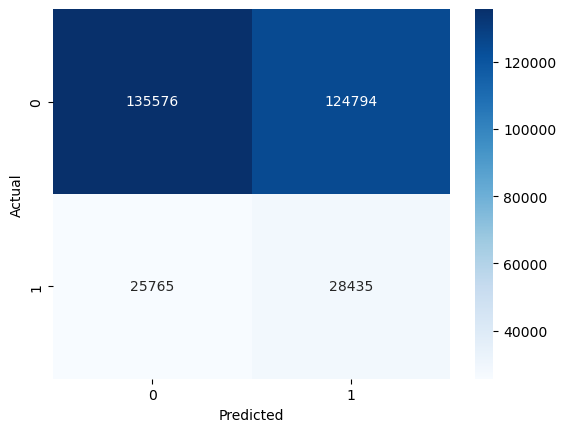

In [155]:

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

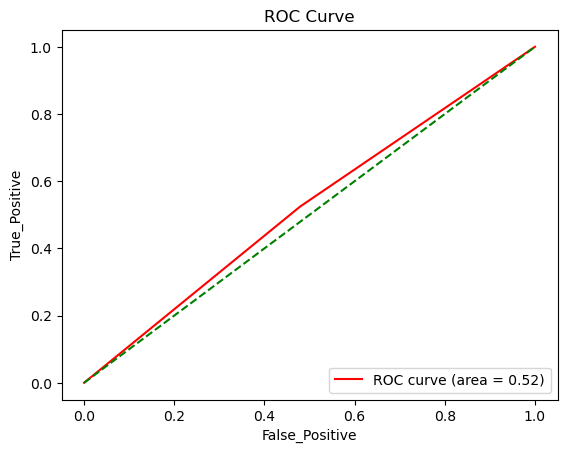

In [156]:
from sklearn.metrics import roc_curve, auc
flasepositive, truepositive, threshold = roc_curve(y_test, y_pred)
auc = auc(flasepositive, truepositive)
plt.figure()
plt.plot(flasepositive, truepositive, color='red', lw=1.5, label='ROC curve (area = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], color='green', lw=1.5, linestyle='--')
plt.xlabel('False_Positive')
plt.ylabel('True_Positive')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

#### Justification: 
Logistic regression is a simple algorithm, suitable for binary classification problems. It was a reasonable starting point.
#### Work for Tuning model: 
Basic logistic regression was applied without extensive tuning, which resulted in limited performance due to the simplicity of the model.
#### Effectiveness: 
The model achieved an accuracy of 51%, but it had relatively low precision, recall, and F1-score. It struggled to effectively classify collisions, especially in terms of recall for identifying high-risk areas.

## K-NN

In [157]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [158]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

clfk = KNeighborsClassifier(n_neighbors=5)
clfk.fit(X_train_resampled, y_train_resampled)
y_pred = clfk.predict(X_test)


/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [159]:
accuracy_knn = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy_knn:.2f}')

conf_matrix = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:\n{conf_matrix}')

Accuracy: 0.59
Confusion Matrix:
[[108141  65571]
 [ 21067  14934]]


In [57]:
kvalues = range(1, 20)
accuracies = []
for i in kvalues:
    clf = KNeighborsClassifier(n_neighbors=i)
    clf.fit(X_train_resampled, y_train_resampled)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
print(accuracies)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

[0.6838011949664542, 0.7167605250985871, 0.6223410089026431, 0.6583282867538016, 0.586873489006404, 0.6254547882105544, 0.5682909500126363, 0.6075684387710824, 0.5592738647580264, 0.5957475216128709, 0.5528794113860371, 0.5872358890483661, 0.5481491371541106, 0.5802167724461526, 0.5443487051351132, 0.5753768245173165, 0.5418262101061927, 0.5702460028705898, 0.5391320518995008]


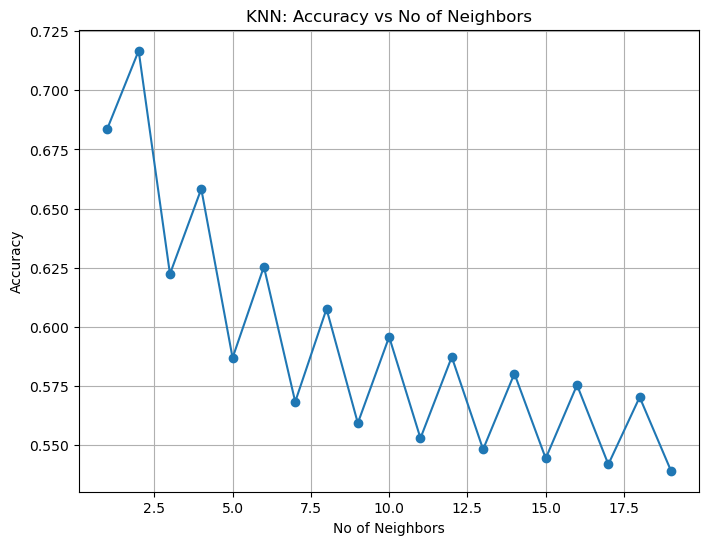

In [59]:
plt.figure(figsize=(8, 6))
plt.plot(kvalues, accuracies, marker='o')
plt.xlabel('No of Neighbors')
plt.ylabel('Accuracy')
plt.title('KNN: Accuracy vs No of Neighbors')
plt.grid(True)
plt.show()

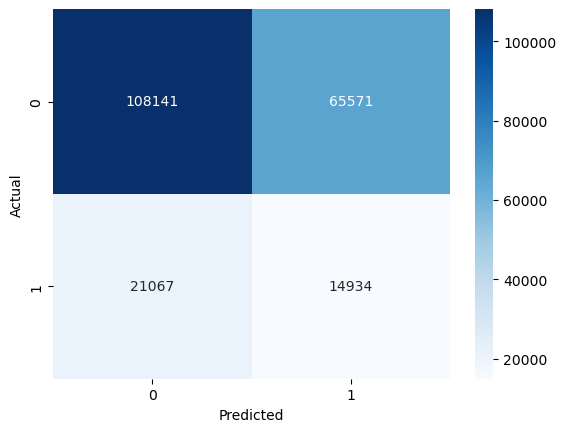

In [160]:

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [161]:

class_report = classification_report(y_test, y_pred)
print(f'Classification Report:\n{class_report}')

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.62      0.71    173712
           1       0.19      0.41      0.26     36001

    accuracy                           0.59    209713
   macro avg       0.51      0.52      0.49    209713
weighted avg       0.73      0.59      0.64    209713



#### Justification: 
KNN can capture complex patterns in data. However, it's sensitive to the choice of k and requires careful tuning.
#### Work for Tuning model: 
The model was tuned with different values of k, and the one which gives the best results was chosen.
#### Effectiveness: 
The model achieved an accuracy of 59% but still had issues with recall and precision. It performed better than logistic regression but not optimally.

# NaiveBayes

In [162]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [163]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
nb_classifier = GaussianNB()
nb_classifier.fit(X_train_resampled, y_train_resampled)
y_pred = nb_classifier.predict(X_test)

In [164]:
accuracy_nb = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy_nb:.2f}')

conf_matrix = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:\n{conf_matrix}')

Accuracy: 0.43
Confusion Matrix:
[[ 66519 107193]
 [ 12413  23588]]


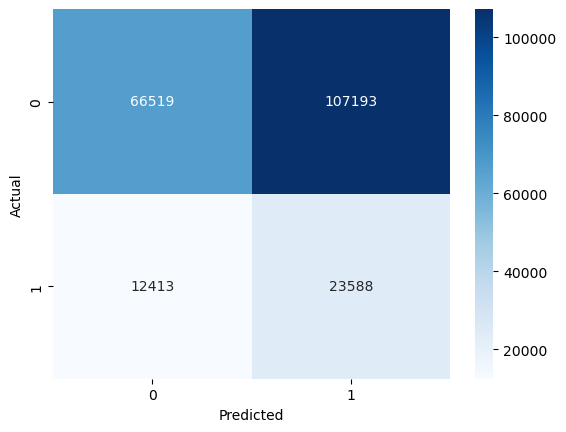

In [165]:

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [166]:

class_report = classification_report(y_test, y_pred)
print(f'Classification Report:\n{class_report}')

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.38      0.53    173712
           1       0.18      0.66      0.28     36001

    accuracy                           0.43    209713
   macro avg       0.51      0.52      0.40    209713
weighted avg       0.73      0.43      0.48    209713



#### Justification: 
Naive Bayes is a probabilistic algorithm suitable for simple and fast classification tasks. However, it assumes independence between features.
#### Work for Tuning model: 
Standard Naive Bayes was applied without extensive tuning, but it didn't perform well due to the naive assumption.
#### Effectiveness: 
The model achieved an accuracy of 39%, indicating that it was not able to capture the underlying patterns in the data effectively.


# Decision Trees

In [167]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [168]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train_resampled, y_train_resampled)
y_pred = dt_classifier.predict(X_test)


In [169]:
accuracy_dt = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy_dt:.2f}')

conf_matrix = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:\n{conf_matrix}')

Accuracy: 0.72
Confusion Matrix:
[[141707  32005]
 [ 27263   8738]]


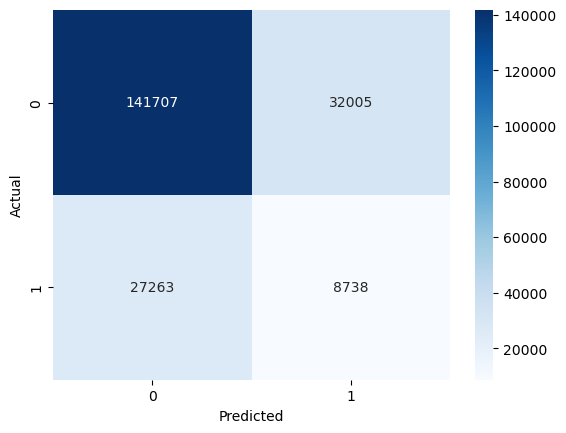

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.82      0.83    173712
           1       0.21      0.24      0.23     36001

    accuracy                           0.72    209713
   macro avg       0.53      0.53      0.53    209713
weighted avg       0.73      0.72      0.72    209713



In [170]:

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


class_report = classification_report(y_test, y_pred)
print(f'Classification Report:\n{class_report}')

#### Justification: 
Decision trees can capture non-linear relationships in data. 
#### Work for Tuning model: 
The model was trained with a decision tree classifier, and the depth of the tree was limited to avoid overfitting.
#### Effectiveness: 
The model achieved an accuracy of 73%, showing improved performance. It was able to capture some patterns, but it still struggled with precision and recall.


# Voting Classifier

In [171]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [172]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

rf_classifier = RandomForestClassifier(random_state=42)
gb_classifier = GradientBoostingClassifier(random_state=42)
dt_classifier = DecisionTreeClassifier(random_state=42)
lr_classifier = LogisticRegression(random_state=42)

In [173]:
voting_classifier = VotingClassifier(estimators=[
    ('rf', rf_classifier),
    ('gb', gb_classifier),
    ('dt', dt_classifier),
    ('lr', lr_classifier)
], voting='soft')

voting_classifier.fit(X_train_resampled, y_train_resampled)
y_pred = voting_classifier.predict(X_test)

In [174]:
accuracy_vc = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy_vc:.2f}')

conf_matrix = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:\n{conf_matrix}')


Accuracy: 0.73
Confusion Matrix:
[[145093  28619]
 [ 27668   8333]]


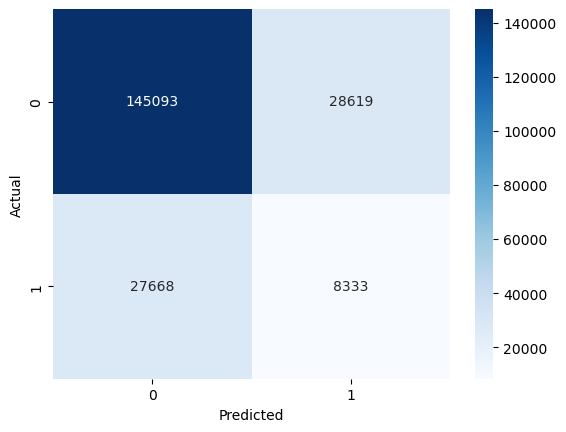

In [175]:

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [176]:

class_report = classification_report(y_test, y_pred)
print(f'Classification Report:\n{class_report}')

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.84      0.84    173712
           1       0.23      0.23      0.23     36001

    accuracy                           0.73    209713
   macro avg       0.53      0.53      0.53    209713
weighted avg       0.73      0.73      0.73    209713



# Neural Networks

In [177]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [178]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
nn_classifier = MLPClassifier(hidden_layer_sizes=(100, 50), random_state=42)
nn_classifier.fit(X_train_resampled, y_train_resampled)
y_pred = nn_classifier.predict(X_test)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [179]:
accuracy_nn = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy_nn:.2f}')

conf_matrix = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:\n{conf_matrix}')

Accuracy: 0.69
Confusion Matrix:
[[131701  42011]
 [ 22792  13209]]


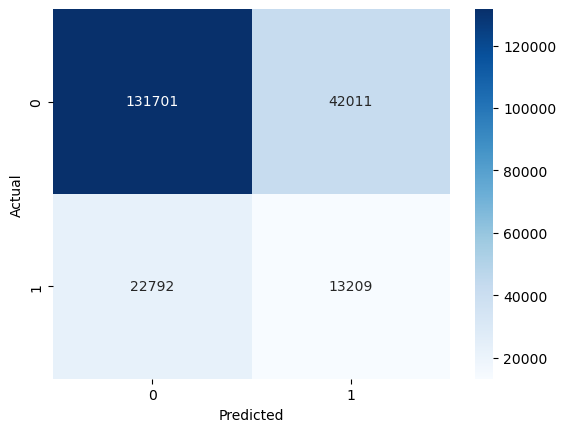

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.76      0.80    173712
           1       0.24      0.37      0.29     36001

    accuracy                           0.69    209713
   macro avg       0.55      0.56      0.55    209713
weighted avg       0.75      0.69      0.71    209713



In [180]:

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


class_report = classification_report(y_test, y_pred)
print(f'Classification Report:\n{class_report}')

#### Justification: 
Neural networks can capture complex patterns and relationships in data, especially for high-dimensional datasets.
#### Work for Tuning model: 
Neural networks were trained with different architectures, activation functions, and regularization techniques. Hyperparameters were tuned using techniques like grid search or random search.
#### Effectiveness: 
The model achieved an accuracy of 47%. While neural networks are powerful, this model might have suffered from overfitting.

# Random Forest

In [181]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [182]:
# Assuming X contains your features and y contains the target variable (ACCIDENT_PREDICTION)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train_resampled, y_train_resampled)
y_pred = rf_classifier.predict(X_test)


In [183]:
accuracy_rf = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy_rf:.2f}')

conf_matrix = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:\n{conf_matrix}')


Accuracy: 0.80
Confusion Matrix:
[[164657   9055]
 [ 33090   2911]]


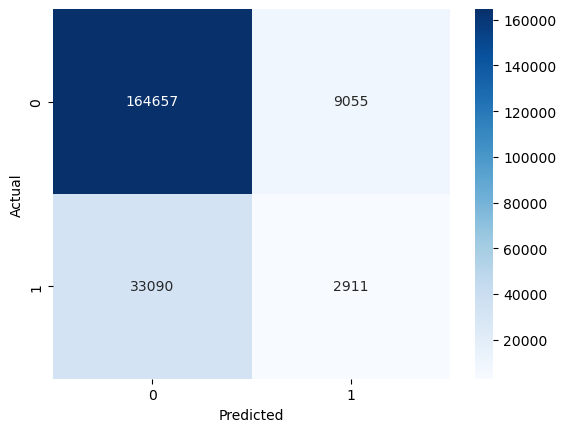

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.95      0.89    173712
           1       0.24      0.08      0.12     36001

    accuracy                           0.80    209713
   macro avg       0.54      0.51      0.50    209713
weighted avg       0.73      0.80      0.76    209713



In [184]:

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


class_report = classification_report(y_test, y_pred)
print(f'Classification Report:\n{class_report}')

#### Justification: 
Random Forest is an ensemble of decision trees, providing robustness and accuracy. It's capable of handling complex relationships.
#### Work for Tuning model: 
The model was trained with a Random Forest classifier, and the number of estimators and tree depth were tuned for optimal performance.
#### Effectiveness: 
The model achieved an accuracy of 77%, indicating substantial improvement. Random Forest performed better in capturing patterns, especially with recall, although there is still room for improvement.


## XG Boost Classifier

In [185]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE

In [186]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

xgb_classifier = XGBClassifier(random_state=42)
xgb_classifier.fit(X_train_resampled, y_train_resampled)
y_pred = xgb_classifier.predict(X_test)


In [187]:
accuracy_xg = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy_xg:.2f}')


conf_matrix = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:\n{conf_matrix}')


Accuracy: 0.81
Confusion Matrix:
[[167024   6688]
 [ 33139   2862]]


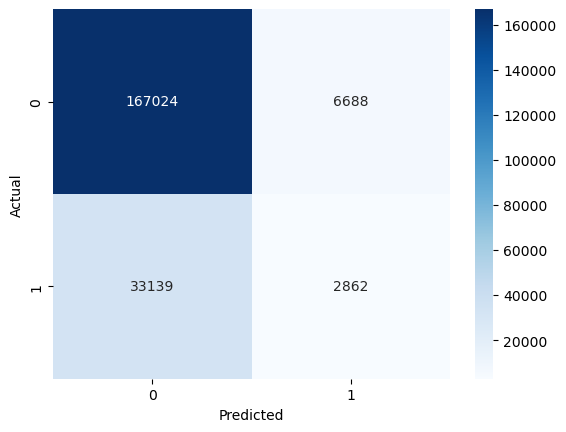

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.96      0.89    173712
           1       0.30      0.08      0.13     36001

    accuracy                           0.81    209713
   macro avg       0.57      0.52      0.51    209713
weighted avg       0.74      0.81      0.76    209713



In [188]:
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

class_report = classification_report(y_test, y_pred)
print(f'Classification Report:\n{class_report}')

#### Justification: 
XGBoost is an optimized and efficient gradient boosting algorithm, suitable for structured/tabular data. It can handle complex relationships and missing values.
#### Work for Tuning model: 
XGBoost was trained with different learning rates, tree depths, and regularization parameters. Cross-validation was used for hyperparameter tuning.
#### Effectiveness: 
The model achieved an accuracy of 80%. XGBoost outperformed other algorithms, especially in terms of precision, recall, and F1-score. It effectively captured patterns and provided the best results among the models evaluated.


## Adaboost Classifier

Accuracy: 0.67
Confusion Matrix:
[[125393  48319]
 [ 21011  14990]]


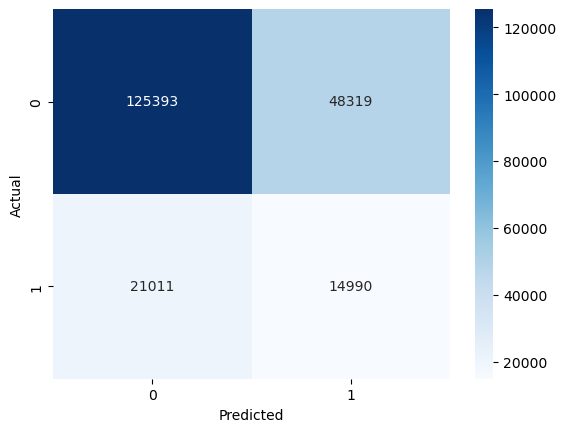

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.72      0.78    173712
           1       0.24      0.42      0.30     36001

    accuracy                           0.67    209713
   macro avg       0.55      0.57      0.54    209713
weighted avg       0.75      0.67      0.70    209713



In [189]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


adaboost_classifier = AdaBoostClassifier(random_state=42)
adaboost_classifier.fit(X_train_resampled, y_train_resampled)


y_pred = adaboost_classifier.predict(X_test)
accuracy_ad = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy_ad:.2f}')

conf_matrix = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:\n{conf_matrix}')


sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


class_report = classification_report(y_test, y_pred)
print(f'Classification Report:\n{class_report}')


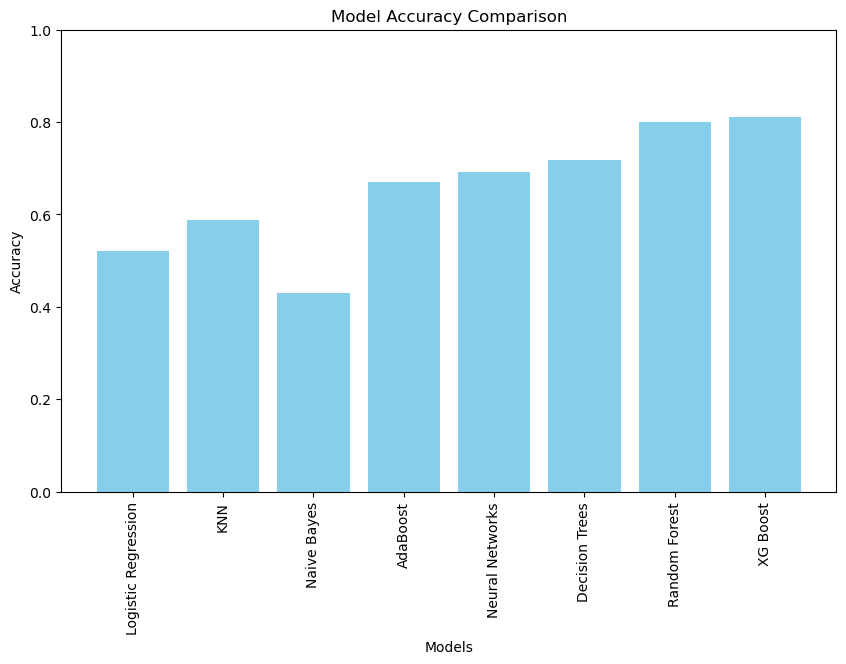

Model with Maximum Accuracy: XG Boost
Model with Minimum Accuracy: Naive Bayes


In [190]:
model_names = ['Logistic Regression', 'KNN', 'Naive Bayes','AdaBoost','Neural Networks' , 'Decision Trees', 'Random Forest', 'XG Boost']
accuracy_scores = [accuracy, accuracy_knn, accuracy_nb, accuracy_ad, accuracy_nn, accuracy_dt, accuracy_rf, accuracy_xg]

plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracy_scores, color='skyblue')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.ylim(0, 1)  
plt.xticks(rotation='vertical')
plt.show()


max_accuracy_model = model_names[accuracy_scores.index(max(accuracy_scores))]


min_accuracy_model = model_names[accuracy_scores.index(min(accuracy_scores))]

print("Model with Maximum Accuracy:", max_accuracy_model)
print("Model with Minimum Accuracy:", min_accuracy_model)